# System Description: Atom-Cavity System with External Drives and Baths

This document describes a quantum system consisting of a two-level atom interacting with a cavity field, potentially driven by external classical laser fields, and coupled to thermal baths causing dissipation and dephasing. The system parameters are highly configurable, allowing for the study of various regimes and interactions.

## 1. System Components

### 1.1. Atom

* **Energy Levels ($N_{at}$):** The atom can be either absent ($N_{at} = 0$) or a two-level system ($N_{at} = 2$) with a ground state $|g\rangle$ and an excited state $|e\rangle$.
* **Energy Separation ($\omega_{at}$):** The energy difference between the excited and ground states is $\hbar \omega_{at}$.
* **Atomic Operators:**
    * $\sigma_- = |g\rangle\langle e|$ and $\sigma_+ = |e\rangle\langle g|$ (lowering & raising operator)
    * Pauli matrices: $\sigma_x = \sigma_+ + \sigma_-$, $\sigma_y = -i (\sigma_+ - \sigma_-)$ and $\sigma_z = |e\rangle\langle e| - |g\rangle\langle g|$
    * $n_{at} = |e\rangle\langle e|$ (number operator for the excited state)

### 1.2. Cavity

* **Number of Levels ($N_{cav}$):** The cavity can be absent ($N_{cav} = 0$) or have a finite even number of energy levels ($N_{cav} > 0$).
* **Energy Separation ($\omega_{cav}$):** The energy difference between consecutive photon number states in the cavity is $\hbar \omega_{cav}$.
* **Cavity Operators:**
    * $a$ and $a^\dagger$ (annihilation & creation operator)
    * $n_{cav} = a^\dagger a$ (photon number operator)

### 1.3. Combined System Operators (if both atom and cavity are present)

The individual atomic and cavity operators are tensored with the identity operator of the other subsystem:

* $SM_{-+} = \mathbb{1}_{cav} \otimes \sigma_{-+}$
* $SI = \mathbb{1}_{cav} \otimes \sigma_I$
* $N_{at} = \mathbb{1}_{cav} \otimes n_{at}$
* $N_{cav} = n_{cav} \otimes \mathbb{1}_{at}$
* $A = a \otimes \mathbb{1}_{at}$

## 2. System Hamiltonian

The total Hamiltonian of the system can include several parts, depending on the chosen interactions:

### 2.1. Free Hamiltonian ($H_0$)

$$
H_0 = \hbar \omega_{at} \sigma_+ \sigma_- + \hbar \omega_{cav} a^\dagger a
$$

If either $N_{at} = 0$ or $N_{cav} = 0$, the corresponding term is omitted.

### 2.2. Atom-Classical Field Interaction

If the atom is driven by a classical laser field with frequency $\omega_{L,at}$ and coupling strength $g_{at}$, the interaction Hamiltonian is:

$$
H_{at-L} = -\hbar Rabi_{at} (\sigma_+ + \sigma_-) E_{real}(t)
$$

where $Rabi_{at} = \sqrt{g_{at}^2 + \delta_{at}^2}$ is the Rabi frequency, where $\delta_{at} = \omega_{at} - \omega_{L,at}$ is the detuning and $E_{real}(t) = \frac{1}{2} (e^{i \omega_{L,at} t} + e^{-i \omega_{L,at} t})$ is the real part of the laser field.

Under the Rotating Wave Approximation (RWA), this interaction simplifies to:

$$
H_{at-L}^{RWA} = -\hbar Rabi_{at} (\sigma_+ e^{-i \omega_{L,at} t} + \sigma_- e^{i \omega_{L,at} t})
$$


### 2.3. Cavity-Classical Field Interaction

Similarly, if the cavity is driven by a classical laser field with frequency $\omega_{L,cav}$ and coupling strength $g_{cav}$, the interaction Hamiltonian is:

$$
H_{cav-L} = -\hbar Rabi_{cav} (a^\dagger + a) E_{real}(t)
$$

$$
H_{cav-L}^{RWA} = -\hbar Rabi_{cav} (a^\dagger e^{-i \omega_{L,cav} t} + a e^{i \omega_{L,cav} t})
$$

### 2.4. Atom-Cavity Interaction

The interaction between the atom and the cavity field with coupling strength $g_{at\_cav}$ is described by the Jaynes-Cummings Hamiltonian:

$$
H_{at-cav}^{RWA} = \hbar Rabi_{at\_cav} (a^\dagger \sigma_- + a \sigma_+ + a^\dagger \sigma_+ + a \sigma_-) = \hbar g_{at\_cav} (a^\dagger + a)(\sigma_- + \sigma_+)
$$

If the Rotating Wave Approximation is applied , the counter-rotating terms are excluded:

$$
H_{at-cav}^{RWA} = \hbar Rabi_{at\_cav} (a^\dagger \sigma_- + a \sigma_+)
$$

This term describes the exchange of a photon between the cavity and the atom, accompanied by the atom transitioning between its energy levels.




The code uses $Rabi_{0, at\_cav} = g_{at\_cav} \sqrt{2 n_{photons\_cav} + 1} / \hbar$. The detuning is $\delta_{at\_cav} = \omega_{at} - \omega_{cav}$, and $Rabi_{at\_cav} = \sqrt{Rabi_{0, at\_cav}^2 + \delta_{at\_cav}^2}$.

## 3. Dissipation and Dephasing

The system is coupled to thermal baths at temperature $T$, leading to energy relaxation and dephasing. The strength of these interactions is characterized by the decay rates $\gamma_{relax}$ and dephasing rates $\gamma_{deph}$.

The thermal occupation number of the baths at frequency $\omega$ and temperature $T$ is given by the Bose-Einstein distribution:

$$
n_{th}(\omega, T) = \frac{1}{e^{\hbar \omega / (k_B T)} - 1}
$$

where $k_B$ is the Boltzmann constant and $T$ is the temperature.

### 3.1. Atomic Decay Channels

* **Relaxation ($\gamma_{relax\_at}$):** The atom can spontaneously decay from the excited state to the ground state, emitting energy into the bath. This is modeled by a Lindblad operator proportional to $\sigma_-$. Thermal excitation from the ground to the excited state is also included, proportional to $\sigma_+$.
* **Dephasing ($\gamma_{deph\_at}$):** Fluctuations in the environment can cause random phase shifts in the atomic superposition states without energy exchange. This is modeled by a Lindblad operator proportional to $\sigma_+ \sigma_-$.

### 3.2. Cavity Decay Channels

* **Relaxation ($\gamma_{relax\_cav}$):** Photons can leak out of the cavity into the bath. This is modeled by a Lindblad operator proportional to $a$. Thermal excitation of photons into the cavity from the bath is also included, proportional to $a^\dagger$.
* **Dephasing ($\gamma_{deph\_cav}$):** Fluctuations can also cause dephasing of the cavity field, modeled by a Lindblad operator proportional to $a^\dagger a$.

The `create_decay_ops_from_strg` function generates the appropriate Lindblad operators (collapse operators, `c_ops_list`) for the master equation or the corresponding system-bath coupling operators (`a_ops_list`) for the bloch redfield eqaution and also for a heom solver that handles baths directly.

## 4. Observables

The `e_ops_strg` parameter defines a tuple of strings indicating which expectation values of system operators should be calculated and tracked during the simulation. These include:

* Pauli matrices: * $\langle \sigma_x \rangle$ (`"sx"`), * $\langle \sigma_y \rangle$ (`"sy"`), * $\langle \sigma_z \rangle$ (`"sz"`)
* $\langle n_{at} \rangle$ (`"n_at"`)
* $\langle n_{cav} \rangle$ (`"n_cav"`)
* $\langle a + a^\dagger \rangle$ (`"a + a.dag()"`) - related to the cavity field quadrature.

The `create_e_ops_from_strg` function translates these strings into the corresponding QuTiP operators.

## 5. Rotating Wave Approximation (RWA)

The code allows for the application of the Rotating Wave Approximation to the atom-classical field, cavity-classical field, and atom-cavity interactions independently, controlled by the boolean flags `RWA_at`, `RWA_cav`, and `RWA_at_cav`, respectively. The RWA is often used when the driving frequencies are close to the system's resonance frequencies, neglecting rapidly oscillating terms that average to zero over time.

## 6. Bath Model Cutoff

The `cutoff` parameter defines the cutoff frequency of the bath model used in solvers like BRME and HEOM. 

## 7. Initial State

The initial state of the combined system is determined in the `create_decay_ops_from_strg` function based on the presence of the atom and/or cavity. For example, the atom can be initialized in the excited state (`atom_e`), a superposition state, or the ground state. The cavity can be initialized with a specific number of photons (`basis(N_cav, n)`), a coherent state (`coherent(N_cav, alpha)`), or the vacuum state. If both are present, the initial state is the tensor product of their individual initial states.

what i did in the last week:
focus one qutip_with_brmesolve

this was a testing ground for the Bloch redfield solver with qutip
-> now I know:
- take S(w) instead of J(w) to encapsulate the Temp-dependance.
- understood better the weak coupling condition (coupling parameter in the spectral density)


before the semana santa:
- build own solver -> either with eq 19 and the explicit dissipative redfield tensor
oor
- with the whole equations of motion

but nothing works

In [ ]:
### IMPORTS ###
# functions from test_baths.py
from src.baths.bath_fcts import (
    spectral_density_func_ohmic,
    spectral_density_func_paper,
    spectral_density_func_drude_lorentz,
    power_spectrum_func_paper,
    power_spectrum_func_ohmic
)
import matplotlib.pyplot as plt
from qutip import *
import numpy as np

from qutip.solver.heom import (
    DrudeLorentzBath,
    HEOMSolver,
    heomsolve,
)
from qutip.utilities import n_thermal


# Import the outsourced plot settings
from src.visualization import mpl_tex_settings

In [ ]:
# =============================
# CLASSICAL FIELD FUNCTIONS
# =============================
def Efield(t: float, omega_laser: float) -> complex:
    """Complex electric field amplitude."""
    return np.exp(1j * omega_laser * t) / 2
def Efield_real(t: float, omega_laser: float) -> float:
    """Real electric field amplitude."""
    E = Efield(t, omega_laser)
    return E + np.conj(E)

# =============================
# SYSTEM CONFIGURATION CLASS
# =============================
from dataclasses import dataclass
from typing import Optional, Tuple, List

@dataclass
class SystemConfig:
    """Configuration class for atom-cavity system parameters."""
    
    # Physical constants
    hbar: float = 1.0
    Boltzmann: float = 1.0
    
    Temp: float = 1e0
    
    # System dimensions
    N_at: int = 2 # Two-level atom (0 for no atom)
    N_cav: int = 0
    
    # Frequencies
    omega_at: float = 1 * 2 * np.pi
    omega_cav_factor: float = 1.0  # multiplier for omega_at
    omega_L_at_factor: float = 1.0
    omega_L_cav_factor: float = 1.0
    
    # Initial conditions
    n_photons_cav: int = 0
    
    # Coupling strengths
    g_at_factor: float = 0.0
    g_cav_factor: float = 0.0
    g_at_cav_factor: float = 0.0
    
    # RWA flags
    RWA_at: bool = False
    RWA_cav: bool = False
    RWA_at_cav: bool = False
    
    # Bath parameters
    gamma_deph_at: float = 1e-3
    gamma_relax_at: float = 1e-3
    gamma_deph_cav: float = 1e-3
    gamma_relax_cav: float = 1e-3
    cutoff_factor: float = 1e2  # multiplier for omega_at

    bath: str = "ohmic"  # Default bath type or "paper"
    
    # Active channels
    decay_channels: Tuple[str, ...] = ("",)  # Fixed default value
    observable_strs: Tuple[str, ...] = ("",)   # Fixed default value
    
    def __post_init__(self):
        """Validate configuration after initialization."""
        if self.N_at not in [0, 2]:
            raise ValueError("N_at must be either 0 (no atom) or 2 (two-level atom)")
        if self.N_cav < 0:
            raise ValueError("N_cav must be non-negative")
    
    @property
    def omega_cav(self) -> float:
        """Cavity frequency."""
        return self.omega_cav_factor * self.omega_at if self.N_cav != 0 else 0.0
    
    @property
    def omega_L_at(self) -> float:
        """Atomic laser frequency."""
        return self.omega_L_at_factor * self.omega_at
    
    @property
    def omega_L_cav(self) -> float:
        """Cavity laser frequency."""
        return self.omega_L_cav_factor * self.omega_cav
    
    @property
    def g_at(self) -> float:
        """Atom-cavity coupling strength."""
        if self.N_at != 0:
            return self.g_at_factor * self.omega_at
        return 0.0    
    
    @property
    def g_cav(self) -> float:
        """Atom-cavity coupling strength."""
        if self.N_cav != 0:
            return self.g_cav_factor * self.omega_cav
        return 0.0
    
    @property
    def g_at_cav(self) -> float:
        """Atom-cavity coupling strength."""
        if self.N_at != 0 and self.N_cav != 0:
            return self.g_at_cav_factor * self.omega_at
        return 0.0

    @property
    def cutoff(self) -> float:
        """Bath cutoff frequency."""
        return self.cutoff_factor * self.omega_at
    
    @property
    def observable_ops(self) -> List[Qobj]:
        """The actual observable_strs."""
        operators = []
        all_ops = OperatorFactory(self)
        for observable_str in self.observable_strs:
            # Convert observable_str to uppercase for consistency
            observable_str = observable_str.upper()
            if observable_str not in all_ops._combined_ops:
                raise ValueError(f"Observable '{observable_str}' not found in operator factory")

            else:
                operators.append(all_ops.get_operator(observable_str))
        return operators

    @property
    def power_func(self) -> callable:
        """power spectrum function based on bath."""
        if self.bath == "ohmic":
            return power_spectrum_func_ohmic
        elif self.bath == "paper":
            return power_spectrum_func_paper
        else:
            raise ValueError("No valid decay channels specified for power spectrum function")

    @property
    def br_decay_channels(self) -> List[Tuple[Qobj, any]]:
        """Generate the a_ops for the Bloch Redfield Master Equation solver."""
        a_ops_ = []
        all_ops = OperatorFactory(self)
        
        # Get the power function once to avoid closure issues
        power_func = self.power_func
        
        for channel in self.decay_channels:
            """GENERAL bath parameters for the power spectrum function."""
            channel_args = {
                "s": 1.0,       # (SUB: <1/SUPER:>1 -) ohmic exponent
                "Boltzmann": self.Boltzmann,
                "hbar": self.hbar,
                "Temp": self.Temp,
                'cutoff': self.cutoff,
            }
            # print("the current channel is", channel)
            if channel == "Deph_at":
                channel_args.update({'alpha': self.gamma_deph_at})
                # Create a proper closure that captures the values, not references
                def power_spectrum_deph_at(w, args=channel_args, func=power_func):
                    return func(w, args)
                a_ops_.append([all_ops.get_operator('N_at'), power_spectrum_deph_at])

            if channel == "Relax_at":
                channel_args.update({'alpha': self.gamma_relax_at * 1000})
                def current_P_fct(w, args=channel_args, func=power_func):
                    return func(w, args)
                a_ops_.append([all_ops.get_operator('SM') + all_ops.get_operator('SM').dag(), current_P_fct])

            if channel == "Deph_cav":
                channel_args.update({'alpha': self.gamma_deph_cav})
                def power_spectrum_deph_cav(w, args=channel_args, func=power_func):
                    return func(w, args)
                a_ops_.append([all_ops.get_operator('N_cav'), power_spectrum_deph_cav])

            if channel == "Relax_cav":
                channel_args.update({'alpha': self.gamma_relax_cav})
                def power_spectrum_relax_cav(w, args=channel_args, func=power_func):
                    return func(w, args)
                a_ops_.append([all_ops.get_operator('A') + all_ops.get_operator('A').dag(), power_spectrum_relax_cav])

            if channel not in ["", "Deph_at", "Relax_at", "Deph_cav", "Relax_cav"]:
                raise ValueError(f"Unknown decay channel: {channel}")
        # print("the final a ops are", a_ops_, flush=True)
        
        return a_ops_
                
    
    @property
    def me_decay_channels(self) -> List[Qobj]:
        """Generate the c_ops for the HEOM solver."""
        c_ops_ = []
        all_ops = OperatorFactory(self)
        for channel in self.decay_channels:
            n_th_at = n_thermal(config.omega_at, config.w_th)
            n_th_cav = n_thermal(config.omega_cav, config.w_th)
            if channel == "Deph_at":
                c_ops_.append(all_ops.get_operator('N_at') * np.sqrt(self.gamma_deph_at * (2 * n_th_at + 1)))  # Collapse operator for dephasing
            if channel == "Relax_at":
                c_ops_.append([all_ops.get_operator('SM').dag() * np.sqrt(self.gamma_relax_at * n_th_at),       # Collapse operator for thermal excitation
                              all_ops.get_operator('SM') * np.sqrt(self.gamma_relax_at * (n_th_at) + 1)]  # Collapse operator for spontaneous and thermal relaxation
                                )
            if channel == "Deph_cav":
                c_ops_.append(all_ops.get_operator('N_cav') * np.sqrt(self.gamma_deph_cav * (2 * n_th_cav + 1)))  # Collapse operator for dephasing
            if channel == "Relax_cav":
                c_ops_.append([all_ops.get_operator('A') * np.sqrt(self.gamma_relax_cav * (n_th_cav) + 1),
                              all_ops.get_operator('A').dag() * np.sqrt(self.gamma_relax_cav * n_th_cav)]  # Collapse operator for thermal excitation and spontaneous relaxation
                                )

            if channel not in ["", "Deph_at", "Relax_at", "Deph_cav", "Relax_cav"]:
                raise ValueError(f"Unknown decay channel: {channel}")
        return c_ops_

    @property
    def w_th(self) -> float:
        """Thermal frequency scale."""
        return self.Boltzmann * self.Temp / self.hbar

# =============================
# OPERATOR FACTORY CLASS
# =============================
class OperatorFactory:
    """Factory class for creating quantum operators based on system configuration."""
    
    def __init__(self, config: SystemConfig):
        self.config = config
        self._atomic_ops = {}
        self._cavity_ops = {}
        self._combined_ops = {}
        self._build_operators()
    
    def _build_atomic_operators(self) -> None:
        """Build atomic operators if atom is present."""
        if self.config.N_at == 0:
            return
            
        if self.config.N_at != 2:
            raise ValueError("Only two-level atoms (N_at=2) are supported")
            
        # Basic atomic states
        atom_g = basis(self.config.N_at, 0)
        atom_e = basis(self.config.N_at, 1)
        
        # Store operators
        self._atomic_ops.update({
            'ground': atom_g,
            'excited': atom_e,
            'sm': atom_g * atom_e.dag(),
            'sx': (atom_g * atom_e.dag() + atom_e * atom_g.dag()),
            'sy': -1j * (atom_e * atom_g.dag() - atom_g * atom_e.dag()),
            'sz': atom_e * atom_e.dag() - atom_g * atom_g.dag(),
            'n_at': ket2dm(atom_e)
        })
    
    def _build_cavity_operators(self) -> None:
        """Build cavity operators if cavity is present."""
        if self.config.N_cav == 0:
            return
            
        a_op = destroy(self.config.N_cav)
        self._cavity_ops.update({
            'a': a_op,
            'n_cav': a_op.dag() * a_op
        })
    
    def _build_combined_operators(self) -> None:
        """Build operators for the combined Hilbert space."""
        if self.config.N_at != 0 and self.config.N_cav != 0:
            # Both systems present
            self._build_tensor_operators()
        elif self.config.N_at != 0:
            # Only atom present - use atomic operators directly but with uppercase keys
            for name, op in self._atomic_ops.items():
                if name not in ['ground', 'excited']:  # Skip state vectors
                    self._combined_ops[name.upper()] = op
        elif self.config.N_cav != 0:
            # Only cavity present - use cavity operators directly but with uppercase keys
            for name, op in self._cavity_ops.items():
                op_name = 'A' if name == 'a' else name.upper()
                self._combined_ops[op_name] = op
    
    def _build_tensor_operators(self) -> None:
        """Build tensor product operators for atom-cavity system."""
        N_at, N_cav = self.config.N_at, self.config.N_cav
        
        # Atomic operators in combined space
        for name, op in self._atomic_ops.items():
            if name not in ['ground', 'excited']:  # Skip state vectors
                self._combined_ops[name.upper()] = tensor(qeye(N_cav), op)
        
        # Cavity operators in combined space
        for name, op in self._cavity_ops.items():
            op_name = 'A' if name == 'a' else name.upper()
            self._combined_ops[op_name] = tensor(op, qeye(N_at))
    
    def _build_operators(self) -> None:
        """Build all operators for the system."""
        self._build_atomic_operators()
        self._build_cavity_operators()
        self._build_combined_operators()
    
    def get_operator(self, name: str) -> Optional[Qobj]:
        """Get an operator by name."""
        return self._combined_ops.get(name.upper())  # Convert to uppercase for consistency
    
    def get_initial_state(self) -> Qobj:
        """Create initial state based on system configuration."""
        if self.config.N_at != 0 and self.config.N_cav != 0:
            psi_at = self._atomic_ops['excited']
            psi_cav = coherent(self.config.N_cav, alpha=0)
            return tensor(psi_cav, psi_at)
        elif self.config.N_at != 0:
            return self._atomic_ops['excited']
        elif self.config.N_cav != 0:
            return coherent(self.config.N_cav, alpha=0)
        else:
            raise ValueError("At least one subsystem must be present")

# =============================
# HAMILTONIAN BUILDER CLASS
# =============================
class HamiltonianBuilder:
    """Class for building system Hamiltonians."""
    
    def __init__(self, config: SystemConfig, operators: OperatorFactory):
        self.config = config
        self.ops = operators
    
    def build_free_hamiltonian(self) -> Qobj:
        """Build the free (non-interacting) Hamiltonian."""
        H_free = 0
        
        if self.config.N_at != 0:
            sm_op = self.ops.get_operator('SM')
            if sm_op is None:
                raise ValueError("Could not get SM operator - check operator factory")
            H_free += self.config.hbar * self.config.omega_at * sm_op.dag() * sm_op
            ### Apply RWA transformation to cavity Hamiltonian
            if self.config.RWA_at:
                # Create diagonal matrix with -i * omega_at for i > 0
                diag_correction = np.zeros(self.config.N_at)
                for i in range(1, self.config.N_at):  # Start from i=1, skip i=0
                    diag_correction[i] = -i * self.config.hbar * self.config.omega_at

                # Create correction operator with same dimensions as atom
                if self.config.N_cav != 0:
                    # Both atom and cavity present - tensor with identity
                    correction_op = tensor(qeye(self.config.N_cav), Qobj(np.diag(diag_correction)))
                else:
                    # Only cavity present
                    correction_op = Qobj(np.diag(diag_correction))
                
                H_free += correction_op
        
        if self.config.N_cav != 0:
            a_op = self.ops.get_operator('A')
            if a_op is None:
                raise ValueError("Could not get A operator - check operator factory")
            H_free += self.config.hbar * self.config.omega_cav * a_op.dag() * a_op

            ### Apply RWA transformation to cavity Hamiltonian
            if self.config.RWA_cav:
                # Create diagonal matrix with -i * omega_cav for i > 0
                diag_correction = np.zeros(self.config.N_cav)
                for i in range(1, self.config.N_cav):  # Start from i=1, skip i=0
                    diag_correction[i] = -i * self.config.hbar * self.config.omega_cav
                
                # Create correction operator with same dimensions as cavity
                if self.config.N_at != 0:
                    # Both atom and cavity present - tensor with identity
                    correction_op = tensor(Qobj(np.diag(diag_correction)), qeye(self.config.N_at))
                else:
                    # Only cavity present
                    correction_op = Qobj(np.diag(diag_correction))
                
                H_free += correction_op
            
        #eigenvals, eigenstates = H_free.eigenstates()
        #H_free = Qobj(np.diag(eigenvals), dims=H_free.dims)

        return H_free
    
    def build_interaction_terms(self) -> List:
        """Build interaction terms for time-dependent Hamiltonian."""
        H_terms = []
        
        # Atom-classical field interaction
        if self.config.g_at != 0 and self.config.N_at != 0:
            print("Building atom-laser interaction terms", flush=True)
            H_terms.extend(self._atom_laser_interaction())
        
        # Cavity-classical field interaction
        if self.config.g_cav != 0 and self.config.N_cav != 0:
            H_terms.extend(self._cavity_laser_interaction())
        
        # Atom-cavity interaction
        if self.config.g_at_cav != 0 and self.config.N_at != 0 and self.config.N_cav != 0:
            H_terms.extend(self._atom_cavity_interaction())

        return H_terms
    
    def _atom_laser_interaction(self) -> List:
        """Build atom-laser interaction terms."""
        delta_at = self.config.omega_at - self.config.omega_L_at
        Rabi_0_at = self.config.g_at / self.config.hbar
        Rabi_at = np.sqrt(Rabi_0_at**2 + delta_at**2) 
        self.config.Rabi_at = Rabi_at
        
        sm_op = self.ops.get_operator('SM')
        
        # Interaction with classical field
        if self.config.RWA_at:
            return [
                [- self.config.hbar * Rabi_at * sm_op.dag(), lambda t, args: Efield(t, self.config.omega_L_at)],
                [- self.config.hbar * Rabi_at * sm_op, lambda t, args: np.conj(Efield(t, self.config.omega_L_at))]
            ]
        else:
            return [[- self.config.hbar * Rabi_at * (sm_op + sm_op.dag()), lambda t, args: Efield_real(t, self.config.omega_L_at)]]

    def _cavity_laser_interaction(self) -> List:
        """Build cavity-laser interaction terms."""
        delta_cav = self.config.omega_at - self.config.omega_L_cav
        Rabi_0_cav = self.config.g_cav * np.sqrt(2 * self.config.n_photons_cav + 1) / self.config.hbar
        Rabi_cav = np.sqrt(Rabi_0_cav**2 + delta_cav**2)
        self.config.Rabi_cav = Rabi_cav

        a_op = self.ops.get_operator('A')
        
        # Interaction with classical field
        if self.config.RWA_cav:
            return [
                [- self.config.hbar * Rabi_cav * a_op.dag(), lambda t, args: Efield(t, self.config.omega_L_cav)],
                [- self.config.hbar * Rabi_cav * a_op, lambda t, args: np.conj(Efield(t, self.config.omega_L_cav))]
            ]
        else:
            return [[- self.config.hbar * Rabi_cav * (a_op + a_op.dag()), lambda t, args: Efield_real(t, self.config.omega_L_cav)]]

    def _atom_cavity_interaction(self) -> List:
        """Build atom-cavity interaction terms."""
        sm_op = self.ops.get_operator('SM')
        a_op = self.ops.get_operator('A')
        
        delta_at_cav = self.config.omega_at - self.config.omega_cav
        Rabi_0_at_cav = self.config.g_at_cav * np.sqrt(2 * self.config.n_photons_cav + 1) / self.config.hbar
        Rabi_at_cav = np.sqrt(Rabi_0_at_cav**2 + delta_at_cav**2)
        self.config.Rabi_at_cav = Rabi_at_cav

        if self.config.RWA_at_cav:
            # Jaynes-Cummings model (RWA)
            return [
                [a_op * sm_op.dag(), -Rabi_at_cav],
                [a_op.dag() * sm_op, -Rabi_at_cav]
            ]
        else:
            # Non-RWA interaction
            return [[(a_op + a_op.dag()) * (sm_op + sm_op.dag()), -Rabi_at_cav]]

# =============================
# USAGE EXAMPLE
# =============================
def create_system(config_updates: dict = None) -> Tuple[SystemConfig, OperatorFactory, Qobj]:
    """
    Create a complete quantum system with given configuration.
    
    Parameters:
    -----------
    config_updates : dict, optional
        Dictionary of configuration parameters to update
    
    Returns:
    --------
    config : SystemConfig
        System configuration
    operators : OperatorFactory
        Operator factory with all system operators
    hamiltonian : Qobj or QobjEvo
        System Hamiltonian
    """
    # Create configuration
    config = SystemConfig()
    if config_updates:
        for key, value in config_updates.items():
            if hasattr(config, key):
                setattr(config, key, value)
    
    # Create operators
    operators = OperatorFactory(config)
    
    # Build Hamiltonian
    builder = HamiltonianBuilder(config, operators)
    H_free = builder.build_free_hamiltonian()
    H_interactions = builder.build_interaction_terms()
    print("the following hamiltonians were built", H_free, H_interactions)
    if H_interactions:
        hamiltonian = QobjEvo([H_free] + H_interactions)
        print(hamiltonian)
    else:
        hamiltonian = H_free
    
    return config, operators, hamiltonian

# =============================
# EXAMPLE USAGE
# =============================
# Create system with custom parameters
custom_config = {
    'Temp': 1e-4,

    'N_at': 2,
    'N_cav': 0,
#    'omega_cav_factor': 1.0,  # Cavity frequency as a factor of omega_at
    'omega_L_at_factor': 1.0,  # Laser frequency for atom
    'g_at_factor': 0,
    'gamma_relax_at': 1e-2,
#    'gamma_deph_at': 1e3,
#    'g_at_cav_factor': 0.1,
#    'RWA_at_cav_factor': True,

    'RWA_at': True,
#    'RWA_cav': True,

    'decay_channels': ("Relax_at",),
    'observable_strs': ("n_at",),

    'bath': "DL",  # or "paper" for the paper spectral density
}
config, ops, H_total = create_system(custom_config)
#print(H_total)
# Get initial state
psi_ini = ops.get_initial_state()
SX_op = ops.get_operator('SX')
SZ_op = ops.get_operator('SZ')
A_op = ops.get_operator('A')
config.me_decay_channels

the following hamiltonians were built Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[0. 0.]
 [0. 0.]] []


[[Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
  Qobj data =
  [[0. 0.]
   [0. 0.]],
  Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=False
  Qobj data =
  [[0. 1.]
   [0. 0.]]]]

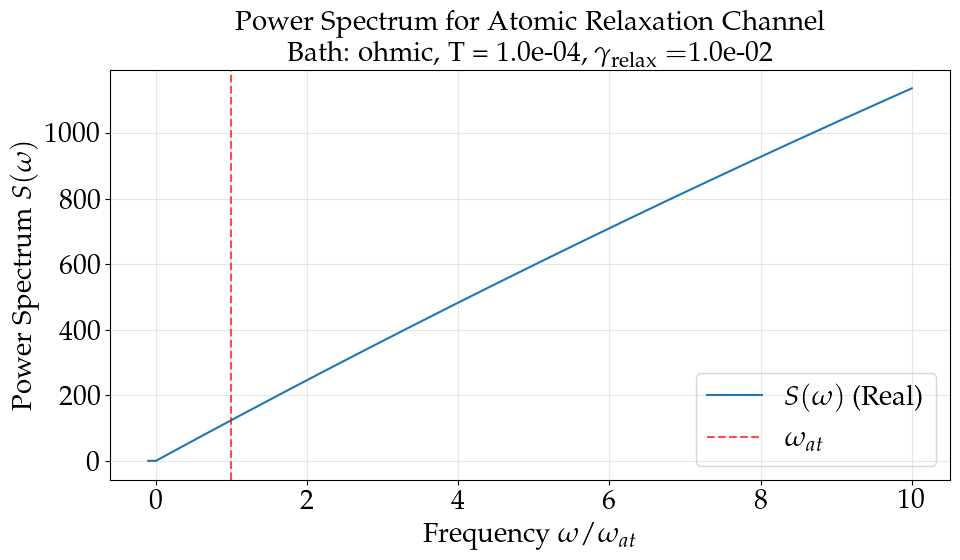

Power spectrum at ω = 0: 0.000e+00
Power spectrum at ω = ω_at: 1.244e+02
Power spectrum at ω = cutoff: 4.623e+03

Channel arguments used:


In [ ]:
# =============================
# VISUALIZE POWER SPECTRUM FUNCTION
# =============================

### Extract the power spectrum function and its parameters from the config
current_P_fct = config.br_decay_channels[0][1]  # This is the power spectrum function for the first decay channel

### Create frequency range for visualization
w_max = 0.1 * config.cutoff  # Maximum frequency
w_range = np.linspace(-0.01*w_max, w_max, 1000)

### Calculate power spectrum values
power_values = [current_P_fct(w) for w in w_range]
power_values = np.array(power_values)

### Create the plot
plt.figure(figsize=(10, 6))

### Plot the power spectrum
plt.plot(w_range / config.omega_at, np.real(power_values), 
         label=r'$S(\omega)$ (Real)', linestyle='solid', color='C0')

if np.any(np.imag(power_values) != 0):
    plt.plot(w_range / config.omega_at, np.imag(power_values), 
             label=r'$S(\omega)$ (Imag)', linestyle='dashed', color='C1')

### Add vertical lines at characteristic frequencies
plt.axvline(x=1, color='red', linestyle='--', alpha=0.7, label=r'$\omega_{at}$')
#plt.axvline(x=config.cutoff/config.omega_at, color='green', linestyle='--', alpha=0.7, 
#           label=r'Cutoff ($\omega_c = $' + f'{config.cutoff_factor:.1f}' + r'$\omega_{at}$)')

### Formatting
plt.xlabel(r'Frequency $\omega / \omega_{at}$')
plt.ylabel(r'power Spectrum $S(\omega)$')
plt.title('power Spectrum for Atomic Relaxation Channel\n' + 
          f'Bath: {config.bath}, T = {config.Temp:.1e}, ' + 
          r'$\gamma_{\mathrm{relax}} = $' + f'{config.gamma_relax_at:.1e}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### Print some key values
print(f"power spectrum at ω = 0: {current_P_fct(0):.3e}")
print(f"power spectrum at ω = ω_at: {current_P_fct(config.omega_at):.3e}")
print(f"power spectrum at ω = cutoff: {current_P_fct(config.cutoff):.3e}")
print(f"\nChannel arguments used:")

[100.0, 0, 0, 0, 0]
[100.0]
t_{max} =  100.0
 Total run time:   1.09s*] Elapsed 1.09s / Remaining 00:00:00:00
 Total run time:   0.85s*] Elapsed 0.84s / Remaining 00:00:00:00


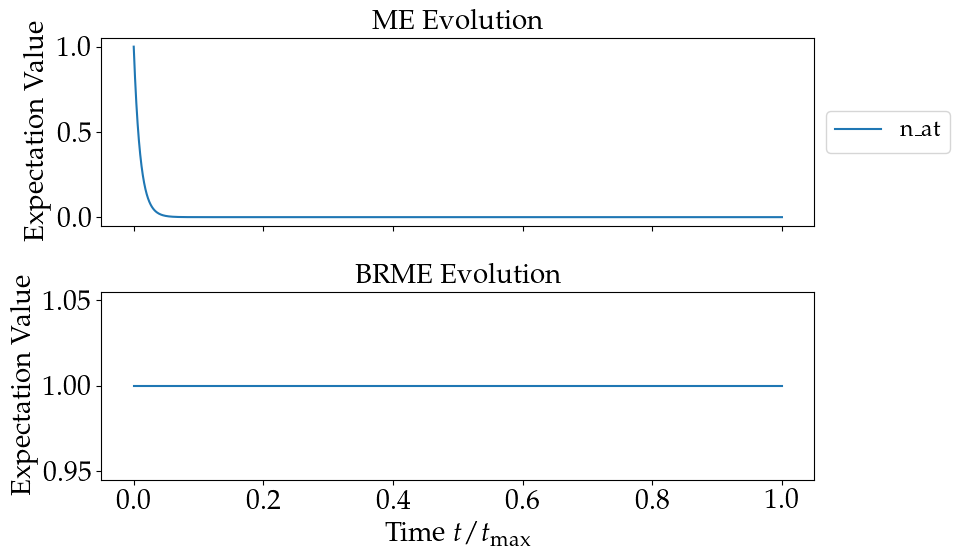

In [24]:
def define_t_max(config: SystemConfig, ) -> float:
    t_max = t_prd_at = t_prd_cav = t_prd_at_cav = t_half_at = t_half_cav = 0

### Determine characteristic times based on the setup
    if config.g_at != 0:
        t_prd_at = 2 * np.pi / config.Rabi_at # Period of atomic Rabi oscillations
    if config.g_cav != 0:
        t_prd_cav = 2 * np.pi / config.Rabi_cav # Period of cavity Rabi oscillations

    if config.g_at_cav != 0:
        t_prd_at_cav = 2 * np.pi / config.Rabi_at_cav # Period of cavity Rabi oscillations

    if "Relax_at" in config.decay_channels:
        n_th_at = n_thermal(config.omega_at, config.w_th)
        t_half_at = 1 / (config.gamma_relax_at * ((2 * n_th_at) + 1)) # Half-life of atomic relaxation
    if "Relax_cav" in config.decay_channels:
        n_th_cav = n_thermal(config.omega_cav, config.w_th)
        t_half_cav = 1 / (config.gamma_relax_cav * ((2 * n_th_cav) + 1)) # Half-life of cavity relaxation

    all_times = [t_half_at, t_half_cav, t_prd_at, t_prd_cav, t_prd_at_cav]
    print(all_times)

### Clear selection of t_max based on the setup
    non_zero_values = [val for val in all_times if val > 0]
    print(non_zero_values)

    t_max = sum(non_zero_values) / len(non_zero_values) if non_zero_values else 0
    print("t_{max} = ", t_max)
    return t_max

t_max = define_t_max(config)
if t_max == 0: t_max = 1

solver_strg = [ # which solvers to use
    "me",
    "brme",
#     "heom",
]


### Define time arrays for evolution
times = np.linspace(0, 1 * t_max, 1000)

default_options = {
    "store_states": True,
    "progress_bar": "enhanced",
    "rtol": 1e-5,
    "atol": 1e-5,
    "nsteps": 15000, # ¿only? for heom?
    "method": "vern9", # ¿only? for heom?
}

### Compute the evolution based on the selected cases
result_brme = result_me = result_heom = None
e_ops=config.observable_ops
if "brme" in solver_strg:
    result_brme = brmesolve(
        H_total,
        psi_ini,
        times,
        e_ops=e_ops,
        a_ops=config.br_decay_channels,
        options=default_options,
    )

if "me" in solver_strg:
    result_me = mesolve(
        H_total,
        psi_ini,
        times,
        e_ops=e_ops,
        c_ops=config.me_decay_channels,
        options=default_options,
    )

if "heom" in solver_strg:
    # for the HEOM solver:
    max_depth = 2  # maximum hierarchy depth to retain
    Nk = 2

    envs = []
    terminators = []

    if not config.decay_channels:
        pass  # Skip this "heom" part if no decay operators are specified

    if "Relax_at" in config.decay_channels:
        env_decay_at = DrudeLorentzBath(SX_op, lam=config.gamma_relax_at * config.cutoff / 2, gamma=config.cutoff, T=config.Temp, Nk=Nk) # decay
        _, terminator_decay_at = env_decay_at.terminator()
        envs.append(env_decay_at)
        terminators.append(terminator_decay_at)
    if "Deph_at" in config.decay_channels:
        env_deph_at = DrudeLorentzBath(SZ_op, lam=config.gamma_deph_at * config.cutoff / 2, gamma=config.cutoff, T=config.Temp, Nk=Nk) # deph
        _, terminator_deph_at = env_deph_at.terminator()
        envs.append(env_deph_at)
        terminators.append(terminator_deph_at)
    if "Relax_cav" in config.decay_channels:
        env_decay_cav = DrudeLorentzBath((A_op), lam=config.gamma_relax_cav * config.cutoff / 2, gamma=config.cutoff, T=config.Temp, Nk=Nk) # decay
        _, terminator_decay_cav = env_decay_cav.terminator()
        envs.append(env_decay_cav)
        terminators.append(terminator_decay_cav)
    if "Deph_cav" in config.decay_channels:
        env_deph_cav = DrudeLorentzBath(SZ_op, lam=config.gamma_deph_cav * config.cutoff / 2, gamma=config.cutoff, T=config.Temp, Nk=Nk) # deph
        _, terminator_deph_cav = env_deph_cav.terminator()
        envs.append(env_deph_cav)
        terminators.append(terminator_deph_cav)

    if terminators:
        total_terminator = sum(terminators)
        L_total = liouvillian(H_total) + total_terminator
        
    #            env_deph_at = DrudeLorentzBath(SZ_op, lam=gamma_deph_at * cutoff / 2, gamma=cutoff, T=Temp, Nk=Nk) # deph
    #            _, terminator_deph_at = env_deph_at.terminator()
    #            envs.append(env_deph_at)
    #            terminators.append(terminator_deph_at)
    #    #        a_ops_list.append(
    #    #            [SZ_op, env_deph_at.spectral_density]  # Dephasing operator
    #    #        )
    print("HEOM terminators:", terminators)

    if not config.decay_channels:
        pass  # Skip this "heom" part if no decay operators are specified
    else:
        # Define the HEOM solver with the provided environment and parameters
        HEOM_dlbath = HEOMSolver(
            L_total, 
            envs, 
            max_depth=max_depth, 
            options=default_options
        )
        
        # Run the HEOM solver and store the result
        result_heom = HEOM_dlbath.run(
            ket2dm(psi_ini), 
            times, 
            e_ops=e_ops
        )

# =============================
# PLOT EVOLUTION
# =============================
fig, axes = plt.subplots(len(solver_strg), 1, figsize=(10, 3*len(solver_strg)), sharex=True)

### Ensure axes is always a list for consistent indexing
if len(solver_strg) == 1:
    axes = [axes]

### Plot result_brme if applicable
if result_brme:
    axes[solver_strg.index("brme")].plot(
        np.array(result_brme.times) / t_max,
        result_brme.expect[0],
        label=config.observable_strs[0],
        linestyle='solid',
        color='C0'
    )
    for i in range(1, len(config.observable_strs)):
        axes[solver_strg.index("brme")].plot(
            np.array(result_brme.times) / t_max,
            result_brme.expect[i],
            label=config.observable_strs[i],
            linestyle=['dashed', 'dashdot', 'dotted'][i-1],
            color=f'C{i}'
        )
    axes[solver_strg.index("brme")].set_ylabel(r'Expectation Value')
    axes[solver_strg.index("brme")].set_title(r'BRME Evolution')

### Plot result_me if applicable
if result_me:
    axes[solver_strg.index("me")].plot(
        np.array(result_me.times) / t_max,
        result_me.expect[0],
        label=config.observable_strs[0],
        linestyle='solid',
        color='C0'
    )
    for i in range(1, len(config.observable_strs)):
        axes[solver_strg.index("me")].plot(
            np.array(result_me.times) / t_max,
            result_me.expect[i],
            label=config.observable_strs[i],
            linestyle=['dashed', 'dashdot', 'dotted'][i-1],
            color=f'C{i}'
        )
    axes[solver_strg.index("me")].set_ylabel(r'Expectation Value')
    axes[solver_strg.index("me")].set_title(r'ME Evolution')

### Plot result_heom if applicable
if result_heom:
    axes[solver_strg.index("heom")].plot(
        np.array(result_heom.times) / t_max,
        result_heom.expect[0],
        label=config.observable_strs[0],
        linestyle='solid',
        color='C0'
    )
    for i in range(1, len(config.observable_strs)):
        axes[solver_strg.index("heom")].plot(
            np.array(result_heom.times) / t_max,
            result_heom.expect[i],
            label=config.observable_strs[i],
            linestyle=['dashed', 'dashdot', 'dotted'][i-1],
            color=f'C{i}'
        )
    axes[solver_strg.index("heom")].set_ylabel(r'Expectation Value')
    axes[solver_strg.index("heom")].set_title(r'HEOM Evolution')

axes[-1].set_xlabel(r'Time $t / t_{\text{max}}$')
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')
plt.tight_layout()
plt.show()

In [ ]:
rho1, rho2 = result_brme.states[-1], result_me.states[-1]
F = fidelity(rho1, rho2)
print(f"Fidelity: {F}")

Fidelity: 0.7331074498432479


In [ ]:
#########SOME TEST approximate correlation fucntion baths to be used in heom
### Not used anymore, just for testing
 
#env = DrudeLorentzBath(SM_op, gamma_relax_at * cutoff / 2, cutoff, Temp, Nk)
#solver = HEOMSolver(H_total, env, max_depth=max_depth, options=default_options)

"""
env = OhmicEnvironment(T=Temp, alpha=gamma_relax_at, wc=cutoff, s=1)
# Fit the correlation function with three exponential terms
times_fit = np.linspace(0, 3 / cutoff, 100)
approx_env, info = env.approx_by_cf_fit(times_fit, target_rsme=None, Nr_max=6, Ni_max=6, maxfev=1e6) # potentially add a guess

plt.plot(times_fit, np.real(env.correlation_function(times_fit)), label='Real part (analytic)')
plt.plot(times_fit, np.real(approx_env.correlation_function(times_fit)), '--', label='Real part (fit)')

plt.plot(times_fit, np.imag(env.correlation_function(times_fit)), label='Imag part (analytic)')
plt.plot(times_fit, np.imag(approx_env.correlation_function(times_fit)), '--', label='Imag part (fit)')

plt.xlabel('Time')
plt.ylabel('Correlation function')
plt.tight_layout()
plt.legend()

times_fit = np.linspace(0, 3 / cutoff, 200)
env_0 = env_2.approx_by_cf_fit(tlist=times_fit, Nr_max=20, full_ansatz=True, maxfev=10000)
#######################################################################################################################################################################
cf = [env_2.correlation_function(t) for t in times_fit]
plt.plot(times_fit, [c.real for c in cf], label="Re(CF)")
plt.plot(times_fit, [c.imag for c in cf], label="Im(CF)")
plt.legend()
plt.show()
#######################################################################################################################################################################
Nk = 2
lambda_ = gamma_relax_at
env_1 = DrudeLorentzBath(SX_op, lam=lambda_ * gamma_relax_at / 2, gamma=cutoff, T=Temp, Nk=Nk) # decay
# -> Problem: temperature is not added!
# -> Problem: gives totally absurd spectral_density
env_2 = OhmicEnvironment(T=Temp, alpha=gamma_relax_at, wc=cutoff, s=1)
env_3 = DrudeLorentzEnvironment(lam=lambda_ * gamma_relax_at / 2, gamma=cutoff, T=Temp, Nk=Nk) # decay
#env_1 = DrudeLorentzBath.from_environment(env_3, SX_op) # env_3 has to be a approximation!!!!!!!!!!!
#print(dir(env_1))
#print(vars(env_1))
#print(env_1.__dict__)

env_1.T = Temp

omega = np.linspace(-50, 50, 1000)
J1 = [env_1.power_spectrum(w) for w in omega]
J2 = [env_2.power_spectrum(w) for w in omega]
J3 = [env_3.power_spectrum(w) for w in omega]

#J = omega * 2 * lambda_ * cutoff / (cutoff**2 + omega**2)
#plt.plot(omega, J, "r", linewidth=2, label = "DL_eq")

plt.figure(figsize=(10, 8))

### Plot spectral densities
plt.plot(omega, J1 / np.max(np.abs(J1)), label=r"$J_1(\omega)$ (DL Bath)", linestyle='solid', color='C0')
plt.plot(omega, J2 / np.max(np.abs(J2)), label=r"$J_2(\omega)$ (Ohmic)", linestyle='dashed', color='C1')
plt.plot(omega, J3 / np.max(np.abs(J3)), label=r"$J_3(\omega)$ (DL Env)", linestyle='dashdot', color='C2')

plt.xlabel(r"Frequency $\omega$")
plt.ylabel(r"Spectral Density $J(\omega) / \max(J)$")
plt.title(r"Comparison of Spectral Densities")
plt.legend()
plt.tight_layout()
plt.show()
#######################################################################################################################################################################
env_decay_at = DrudeLorentzBath(SM_op + SM_op.dag(), lam=gamma_relax_at * cutoff / 2, gamma=cutoff, T=Temp, Nk=Nk) # decay
env_decay_at.T = Temp

a_ops_list = []

a_ops_list.append([
    SM_op + SM_op.dag(), 
    env_1.spectral_density
    ]  # Relaxation operator
)

result_brme = brmesolve(
    H0,
    psi_ini,
    times,
    a_ops=a_ops_list,
    options=opts  # Pass options here
)"""

<>:7: SyntaxWarning: invalid escape sequence '\o'
<>:7: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_203614/2059129247.py:7: SyntaxWarning: invalid escape sequence '\o'
  """


'\nenv = OhmicEnvironment(T=Temp, alpha=gamma_relax_at, wc=cutoff, s=1)\n# Fit the correlation function with three exponential terms\ntimes_fit = np.linspace(0, 3 / cutoff, 100)\napprox_env, info = env.approx_by_cf_fit(times_fit, target_rsme=None, Nr_max=6, Ni_max=6, maxfev=1e6) # potentially add a guess\n\nplt.plot(times_fit, np.real(env.correlation_function(times_fit)), label=\'Real part (analytic)\')\nplt.plot(times_fit, np.real(approx_env.correlation_function(times_fit)), \'--\', label=\'Real part (fit)\')\n\nplt.plot(times_fit, np.imag(env.correlation_function(times_fit)), label=\'Imag part (analytic)\')\nplt.plot(times_fit, np.imag(approx_env.correlation_function(times_fit)), \'--\', label=\'Imag part (fit)\')\n\nplt.xlabel(\'Time\')\nplt.ylabel(\'Correlation function\')\nplt.tight_layout()\nplt.legend()\n\ntimes_fit = np.linspace(0, 3 / cutoff, 200)\nenv_0 = env_2.approx_by_cf_fit(tlist=times_fit, Nr_max=20, full_ansatz=True, maxfev=10000)\n######################################